In [1]:
import numpy as np

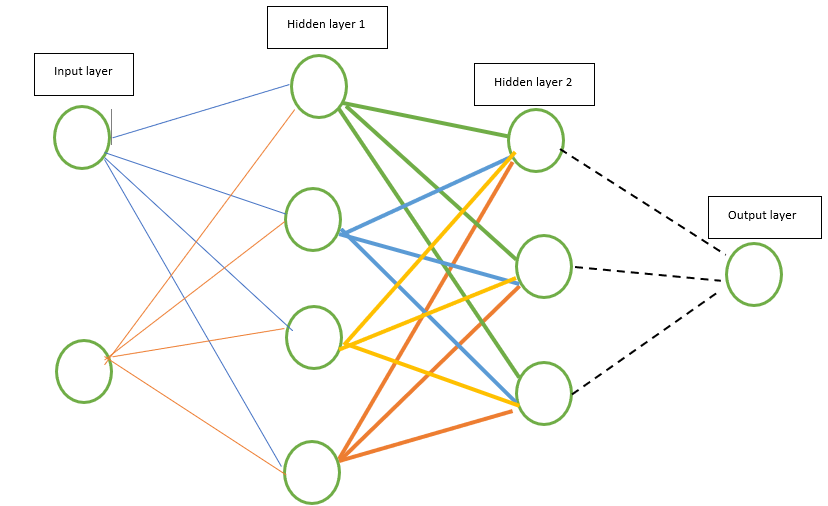

If we initialize the weights of the above neural network architecture, it would be:

hidden layer 1 would have the weight matrix of dimension (4,2),

hidden layer 2 would have the weight matrix of dimension (3,4),

And the output layer would have the weight dimension (1,3)

In [29]:
#Scratch code implementation of random weight inilialization
def weight_initializer(l):
    #l = number of layers and number of neurons in each layer
    parameters  = {}
    for i in range(1,len(l)):
        parameters["W"+str(i)] = np.random.randn(l[i],l[i-1])
    return parameters

In [28]:
for i,j in weight_initializer([2,4,3,1]).items():
    print(f'{i} = {j}')
    print(f'Shape of {i} is {j.shape},\n')

W1 = [[ 0.50662332 -0.89876896]
 [ 2.30736498 -0.61508728]
 [ 0.7155388   1.60800814]
 [-0.42895498 -0.42330706]]
Shape of W1 is (4, 2),

W2 = [[ 0.15170754  0.41441705  0.49685014  1.43254858]
 [-1.45608321  0.67675016  1.20306566 -1.01044734]
 [-0.14342773 -0.80716944  0.54329303  1.4219461 ]]
Shape of W2 is (3, 4),

W3 = [[ 0.17650842  0.18274791 -0.50284997]]
Shape of W3 is (1, 3),



We can always have bigger/deeper neural network than the above one. Something like below.

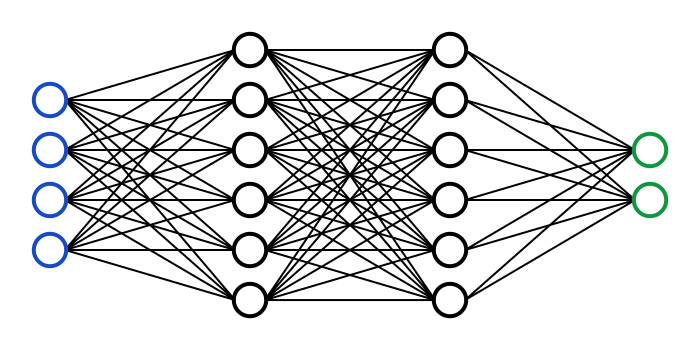

While doing a forward propagation, we multiply each weight matrix with the input of its layer and add bias. This process continues until we reach an output layer and get yhat. Let's imagine that while initializing the weights randomly (like above), our weight matrix can have any value. Less than one or greater than one. If all the weights are greater than one, then the value of yhat will grow exponentially casing the problem of Exploding Gradient. If all the weights are too small, then yhat will get exponentially small casing the problem Vanishing Gradient. Both of these problem results in slowing down the training process because it will take longer time to get to the optimum value. 

The solution is to follow the proper weight initializing techniques. We have two popular weight initialization techniques for different activation functions. 

If we are using relu activation function: He initialization is preferred. If we are using the sigmoid/tanh activation function, then Xavier initialization is preferred. I have detailly explained the two techniques in my LinkedIn article:
https://www.linkedin.com/pulse/importance-initializing-weights-properly-shreejan-shrestha/?trk=public_profile-settings_article_view

In [37]:
#Scratch code implementation of random weight inilialization with He initialization technique
def weight_initializer_for_relu(l): #He weight initialization technique
    #l = number of layers and number of neurons in each layer
    parameters  = {}
    for i in range(1,len(l)):
        parameters["W"+str(i)] = np.random.randn(l[i],l[i-1]) * np.sqrt(2/l[i-1])
    return parameters

In [38]:
for i,j in weight_initializer_for_relu([2,4,3,1]).items():
    print(f'{i} = {j}')
    print(f'Shape of {i} is {j.shape},\n')

W1 = [[ 0.1513596   0.53969618]
 [-0.93265959  0.33387868]
 [ 0.40991401  1.87290655]
 [-0.6856981   0.65345006]]
Shape of W1 is (4, 2),

W2 = [[ 0.78577911 -0.33078221 -1.04444657 -0.36897398]
 [ 0.23566268  0.12750208  0.291242   -0.67060325]
 [-0.72161618  1.45846424  0.32802736  0.71315898]]
Shape of W2 is (3, 4),

W3 = [[ 0.83542655 -0.53497196 -1.00134132]]
Shape of W3 is (1, 3),



In [39]:
#Scratch code implementation of random weight inilialization with He initialization technique
def weight_initializer_for_sigmoid(l): #Xaview weight initialization tenchique
    #l = number of layers and number of neurons in each layer
    parameters  = {}
    for i in range(1,len(l)):
        parameters["W"+str(i)] = np.random.randn(l[i],l[i-1]) * np.sqrt(2/(l[i-1]+l[i]))
    return parameters

In [40]:
for i,j in weight_initializer_for_sigmoid([2,4,3,1]).items():
    print(f'{i} = {j}')
    print(f'Shape of {i} is {j.shape},\n')

W1 = [[-0.54515837  0.60240275]
 [ 0.4071778  -0.39927684]
 [ 0.10381352  0.02506698]
 [ 0.70602864  0.64444799]]
Shape of W1 is (4, 2),

W2 = [[ 0.44639582 -0.34469199 -0.46293724 -0.04484474]
 [-0.81393158 -0.40590212  0.75364203 -1.00670834]
 [-1.29606274 -0.43639361 -0.29737454 -0.03876679]]
Shape of W2 is (3, 4),

W3 = [[-0.78974468 -0.12225667 -0.5391599 ]]
Shape of W3 is (1, 3),



This does not solve the problem completely but tries to maintain the weights close to 1 so that we will not have the vanishing or exploding gradient.